 Name:- Sourabh Solanki
    
Batch:- DS2403

Project Description:
    
    This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Importing Libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

# Loading Datasets

In [229]:
df = pd.read_csv('census.csv') 

In [230]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Data set Contains 32560 Rows and 15 Columns

In [231]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [232]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [233]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Cheking Null Values

In [235]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There Is no Null values in this data sets

In [236]:
df.duplicated().sum()

24

In [237]:
df.drop_duplicates(inplace=True)

In [238]:
df.shape

(32536, 15)

In [239]:
for i in df.columns:
    print(df[i].value_counts())
    print('_'*100)

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
____________________________________________________________________________________________________
Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
____________________________________________________________________________________________________
Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64
____________________________________________________________________________________________________
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5

In this data set their is no null values but it contains missing values in the form of '?' which need to be processed for our modeling

In [240]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [241]:
for i in df.columns:
    df[i].replace([' ?'],df[i].mode()[0],inplace=True)

In [242]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [243]:
df.isin([0]).sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29825
Capital_loss      31017
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

In [244]:
(df.isin([0]).sum()/len(df))*100

Age                0.000000
Workclass          0.000000
Fnlwgt             0.000000
Education          0.000000
Education_num      0.000000
Marital_status     0.000000
Occupation         0.000000
Relationship       0.000000
Race               0.000000
Sex                0.000000
Capital_gain      91.667691
Capital_loss      95.331325
Hours_per_week     0.000000
Native_country     0.000000
Income             0.000000
dtype: float64

In [245]:
df.drop(columns=['Capital_gain', 'Capital_loss'], inplace =True, axis=1)

drop the unneccessory coloumns

In [246]:
cat_col = []
for i in df.columns:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical columns :', cat_col)
print('\n')


num_col =[]
for i in df.columns:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Categorical columns :', num_col)

Categorical columns : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Categorical columns : ['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


Seprating categorical columns and numeric columns

In [247]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: xlabel='Income', ylabel='count'>

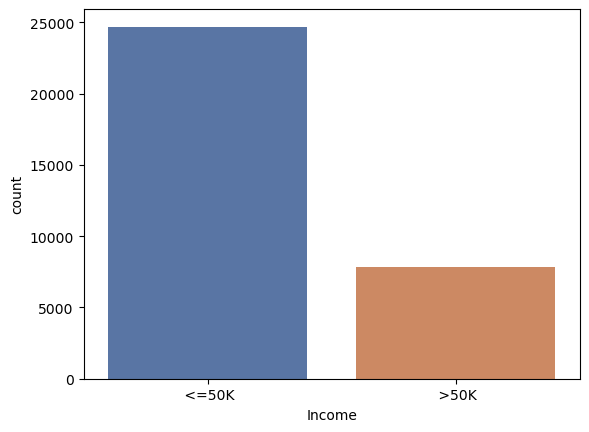

In [248]:
df['Income'].value_counts()
sns.countplot(x='Income', data=df)

<Axes: xlabel='Age', ylabel='count'>

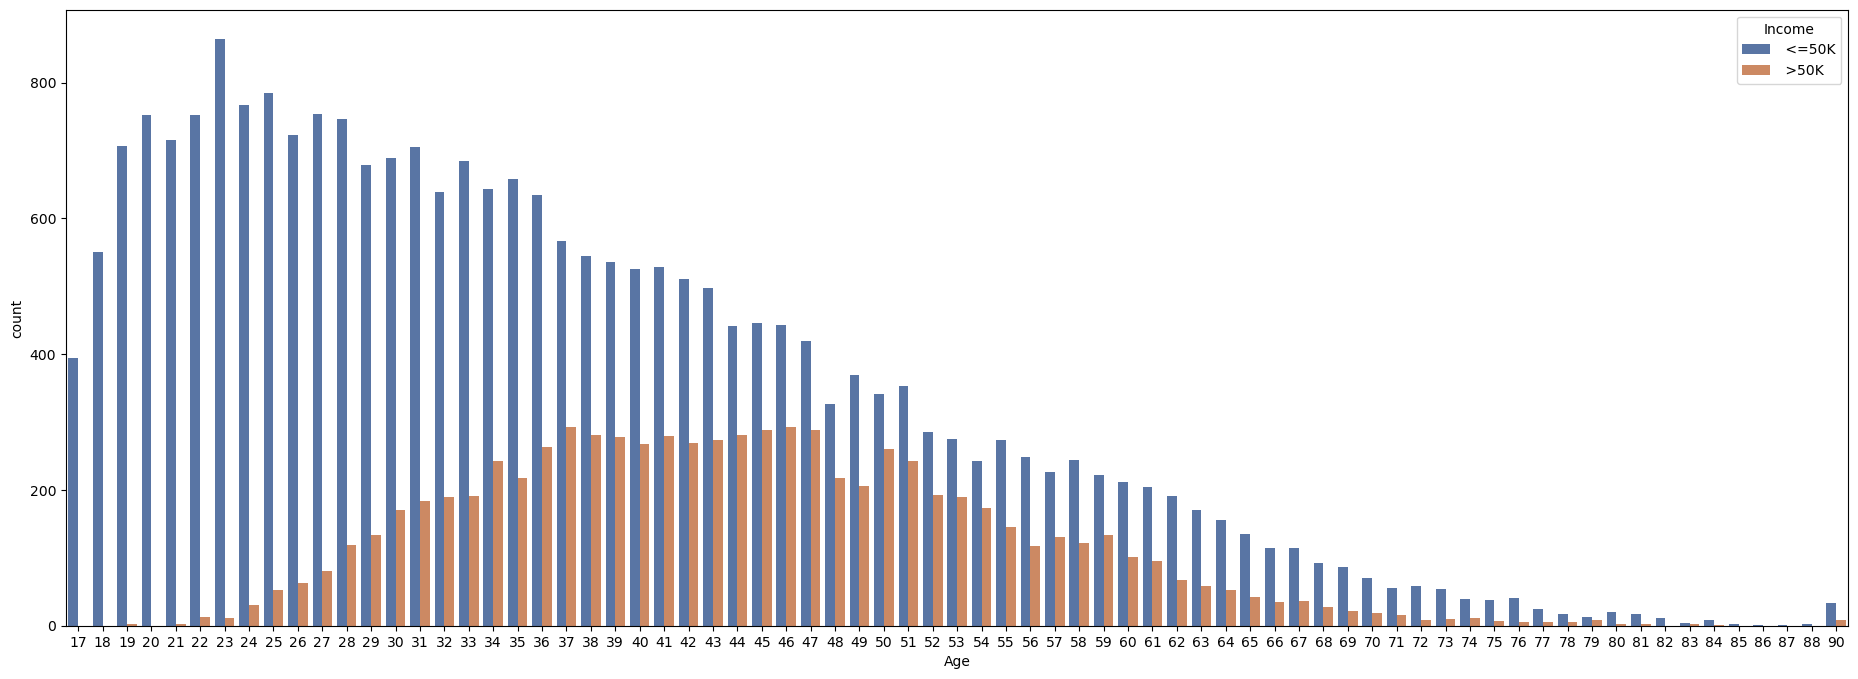

In [249]:
plt.figure(figsize=(23,8))
sns.countplot(x='Age', hue='Income', data=df)

we can see that age 17 to 21 people having less than 50K of income and after increasing age we see in category of  more than 50k no of people are increasing

<Axes: xlabel='Relationship', ylabel='count'>

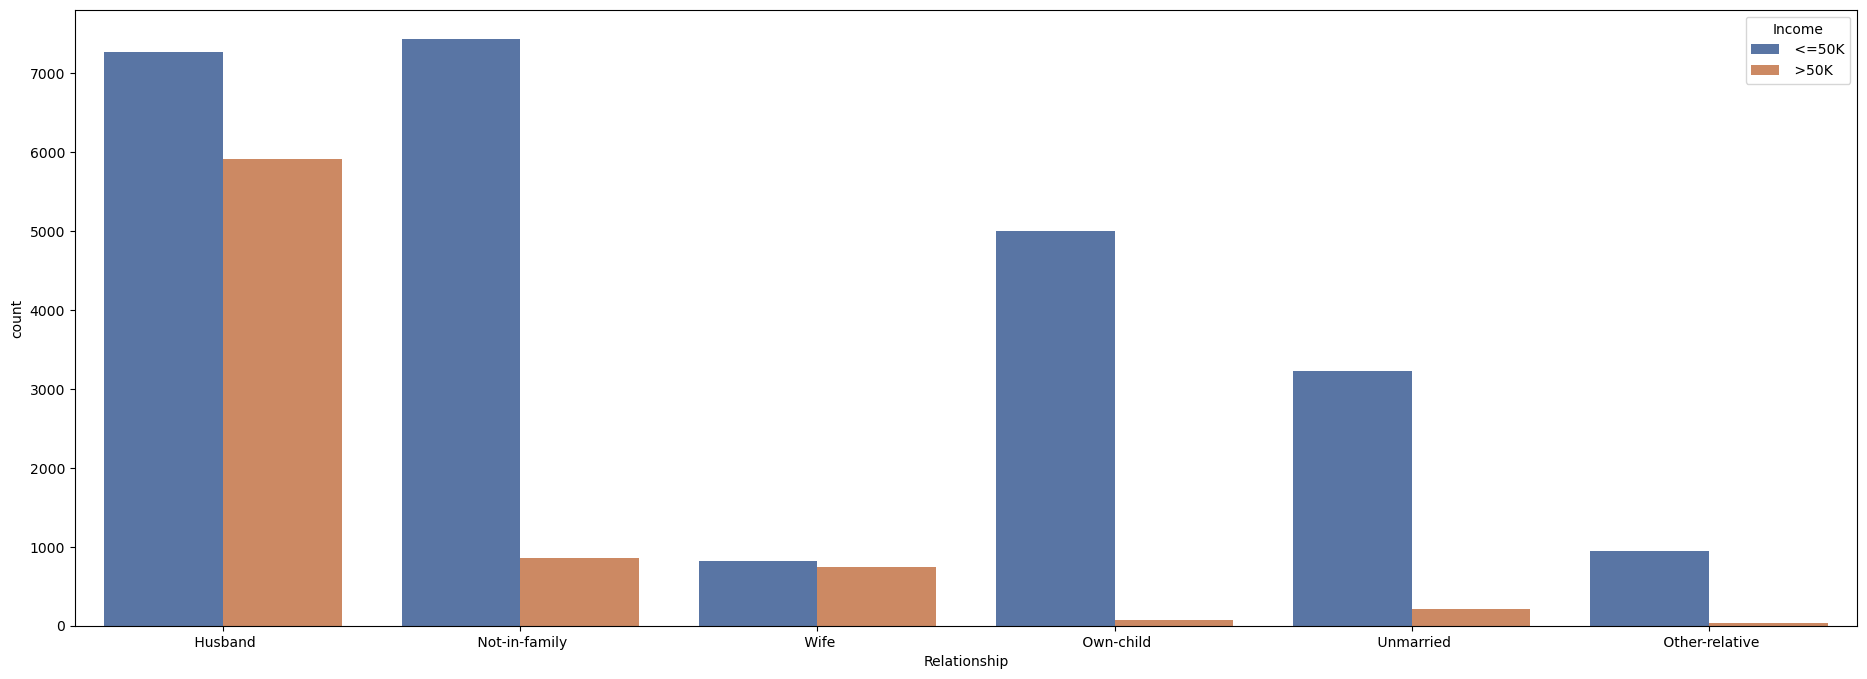

In [250]:
plt.figure(figsize=(23,8))
sns.countplot(x='Relationship', hue='Income', data=df)

Only husband have almost 6000 people having more than 50k income

<Axes: xlabel='Marital_status', ylabel='count'>

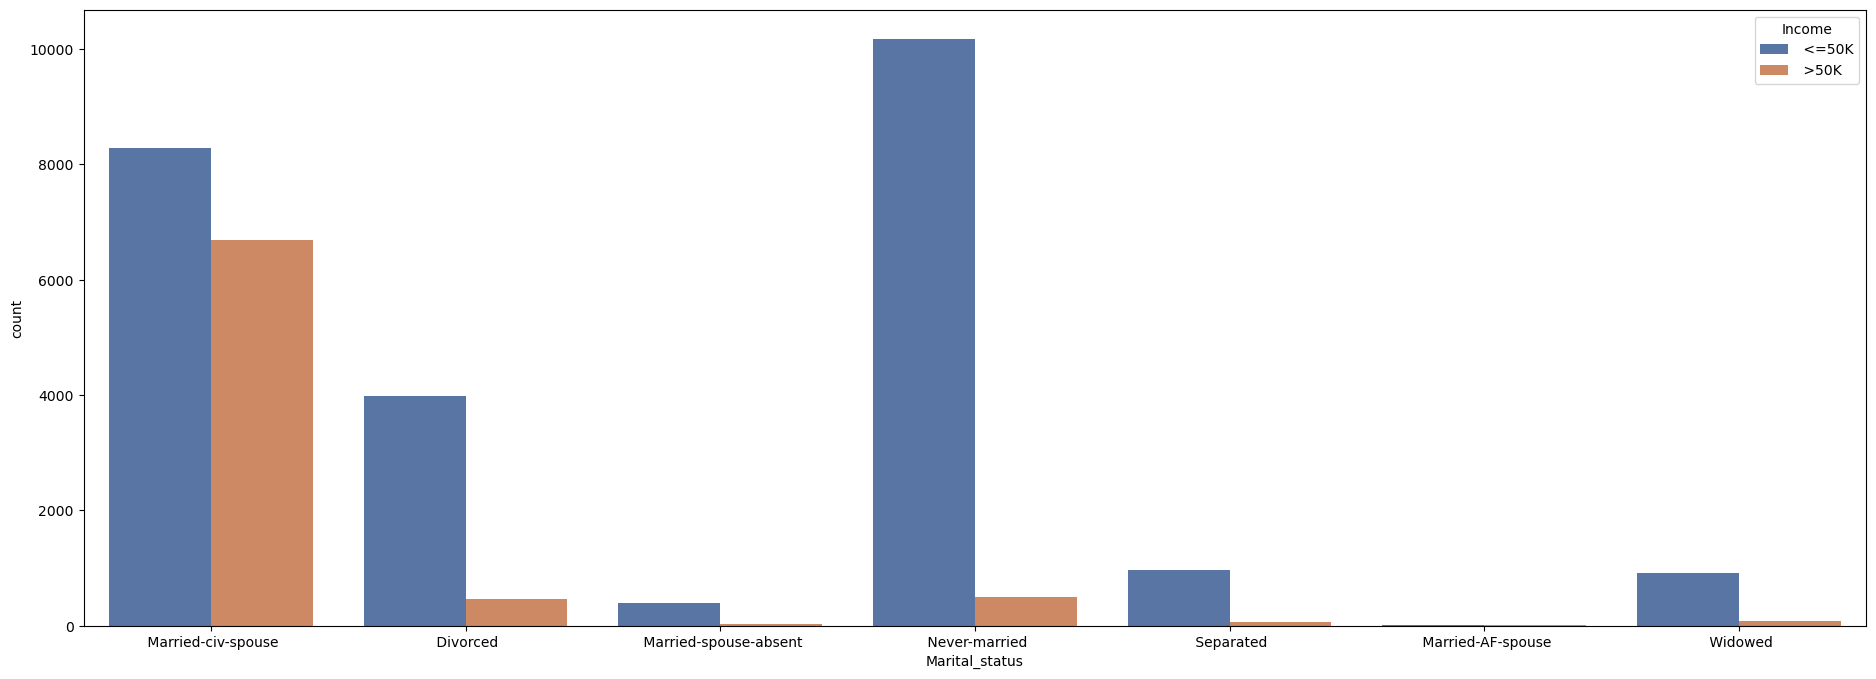

In [251]:
plt.figure(figsize=(23,8))
sns.countplot(x='Marital_status', hue='Income', data=df)

In marital status only married -cv- spouse having more than 50k income

Comparision to other maritial status

<Axes: xlabel='Education_num', ylabel='count'>

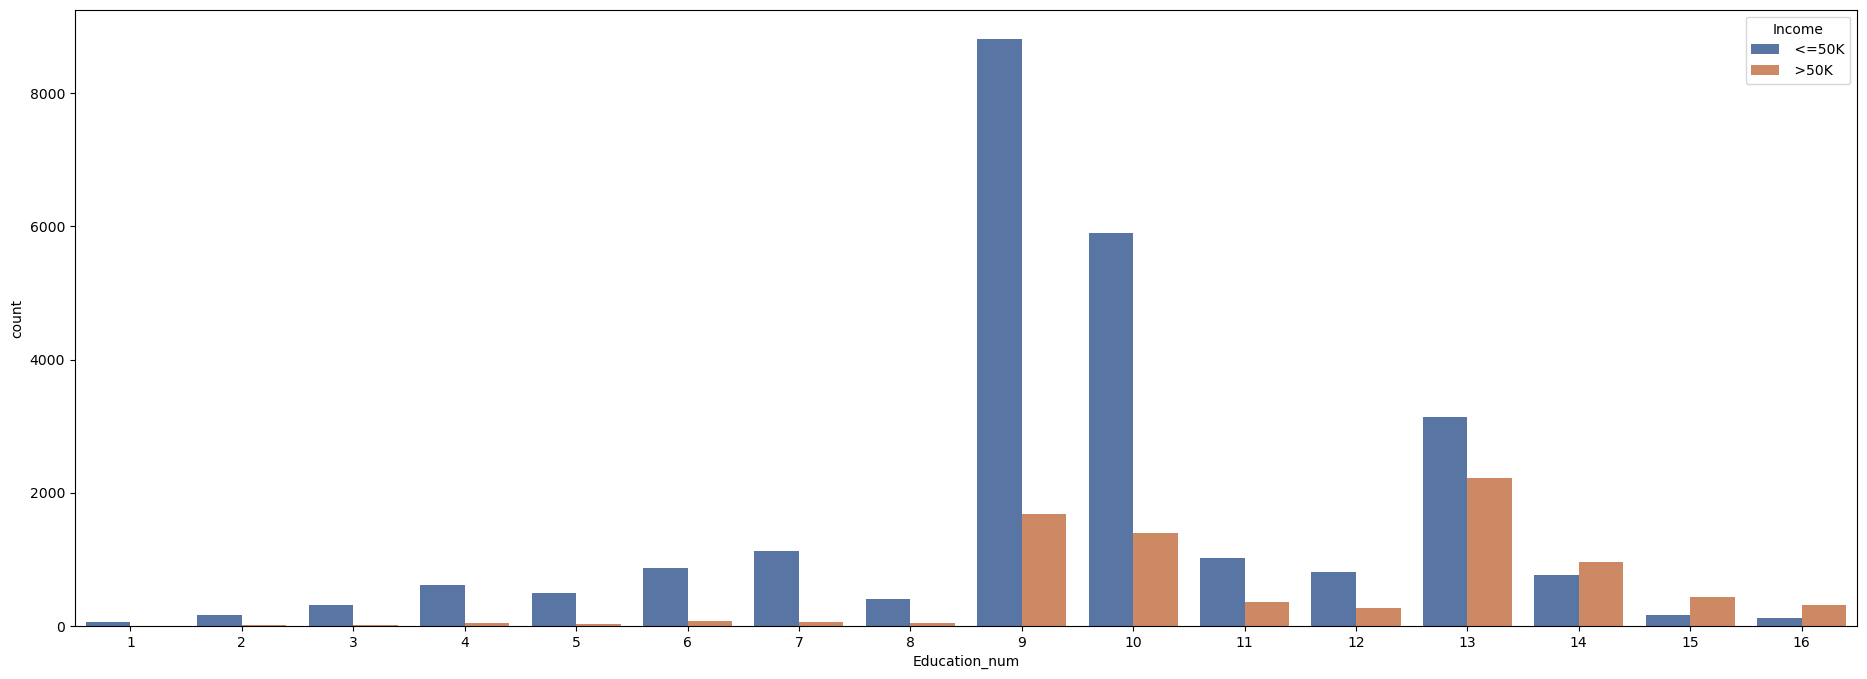

In [252]:
plt.figure(figsize=(23,8))
sns.countplot(x='Education_num', hue='Income', data=df)

<Axes: xlabel='Education', ylabel='count'>

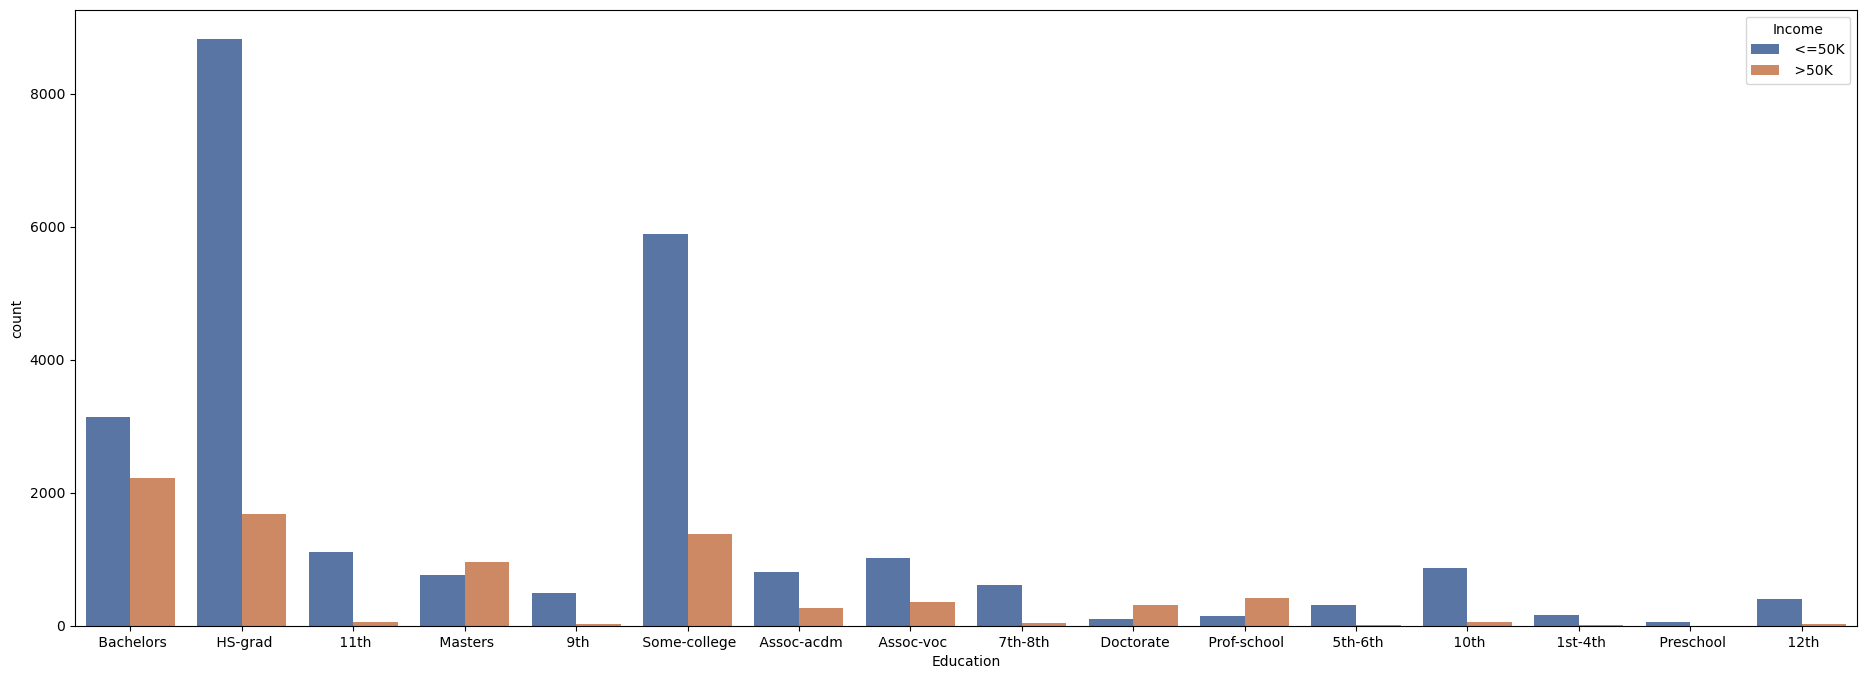

In [253]:
plt.figure(figsize=(23,8))
sns.countplot(x='Education', hue='Income', data=df)

<Axes: xlabel='Workclass', ylabel='count'>

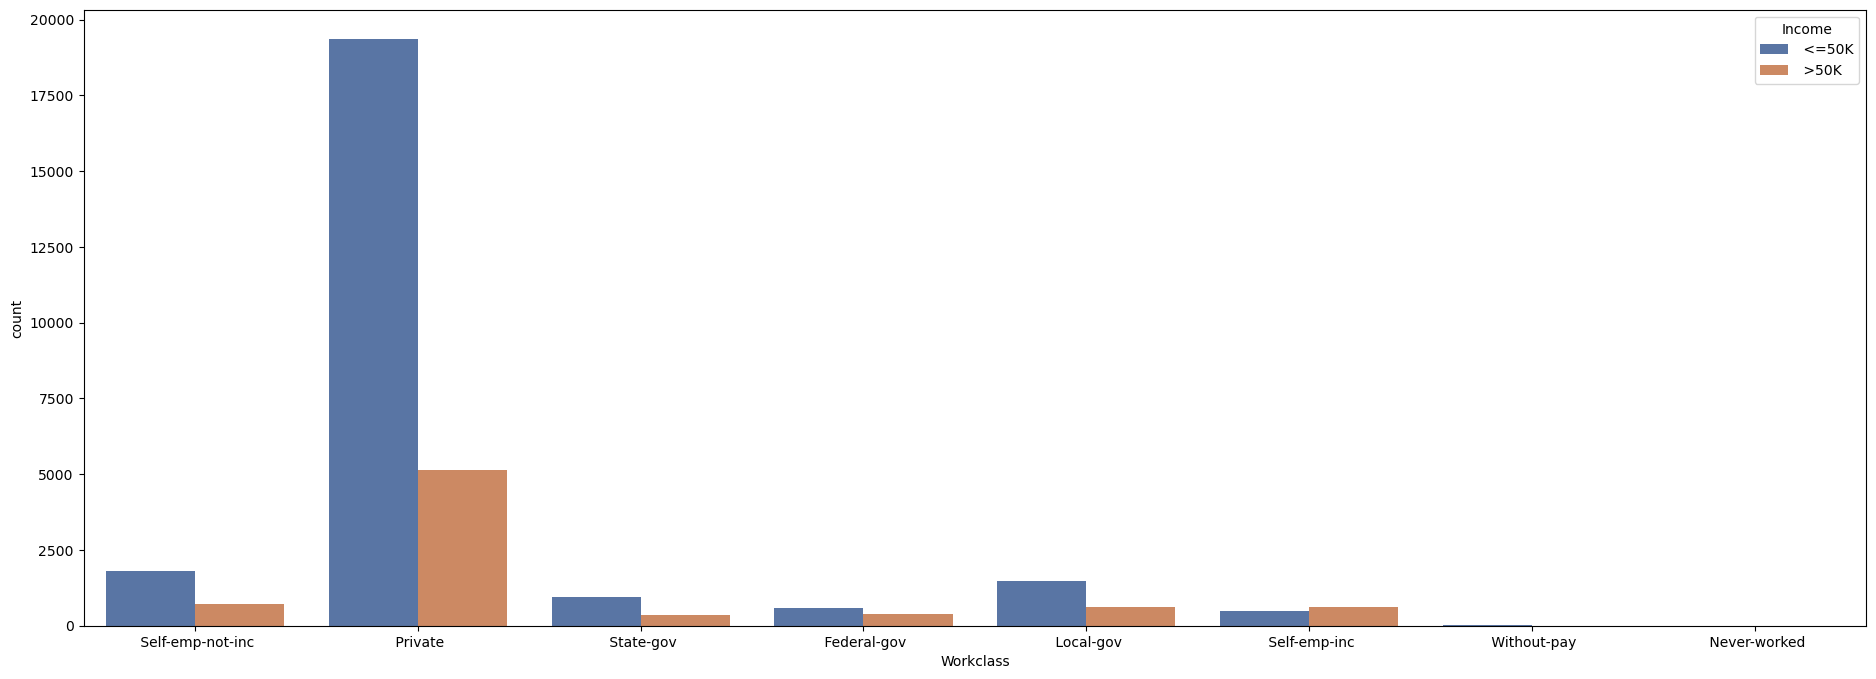

In [254]:
plt.figure(figsize=(23,8))
sns.countplot(x='Workclass', hue='Income', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

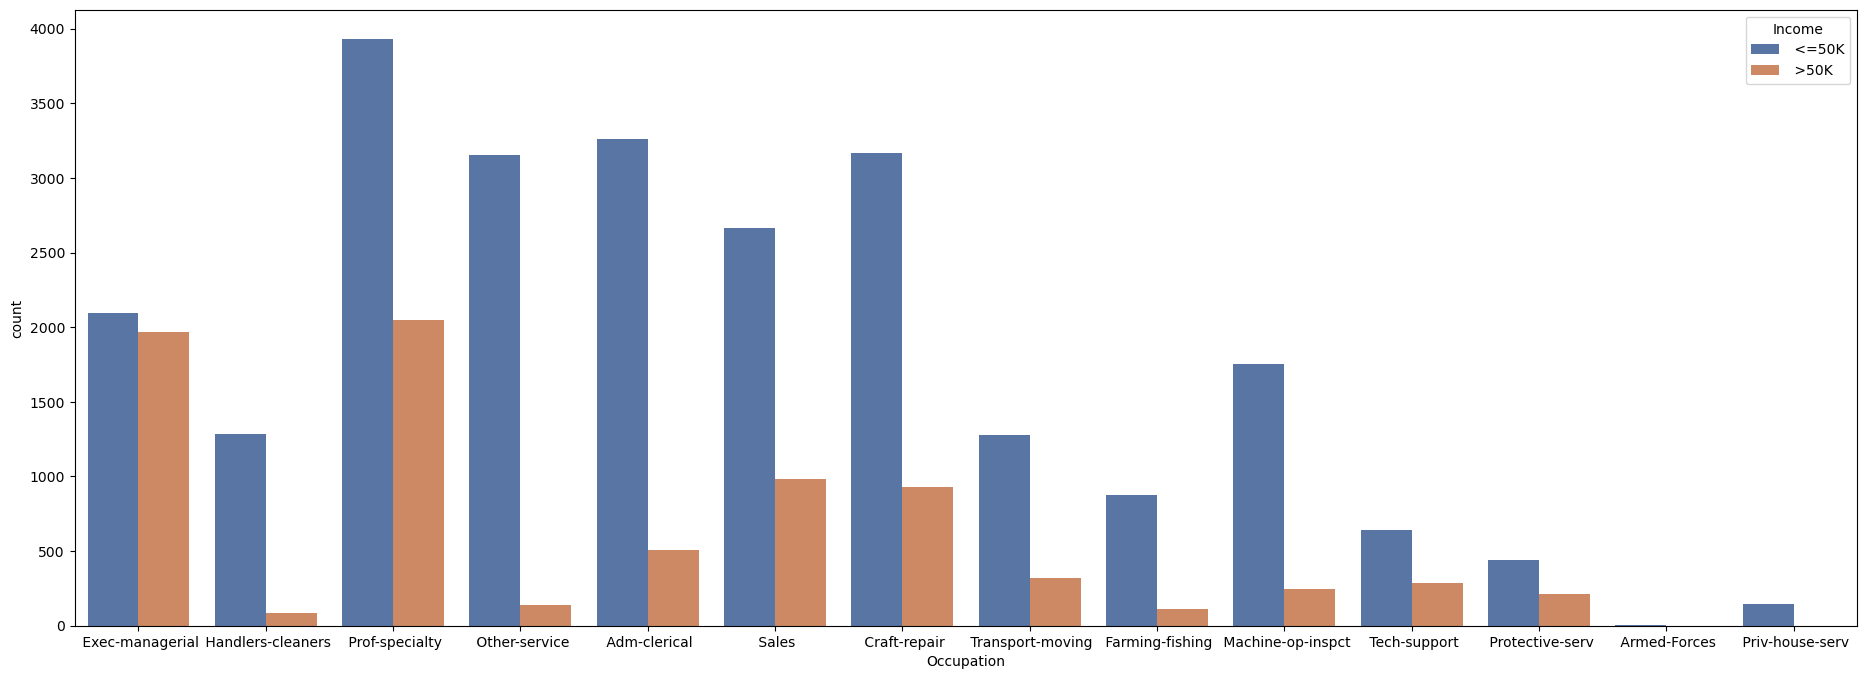

In [255]:
plt.figure(figsize=(23,8))
sns.countplot(x='Occupation', hue='Income', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

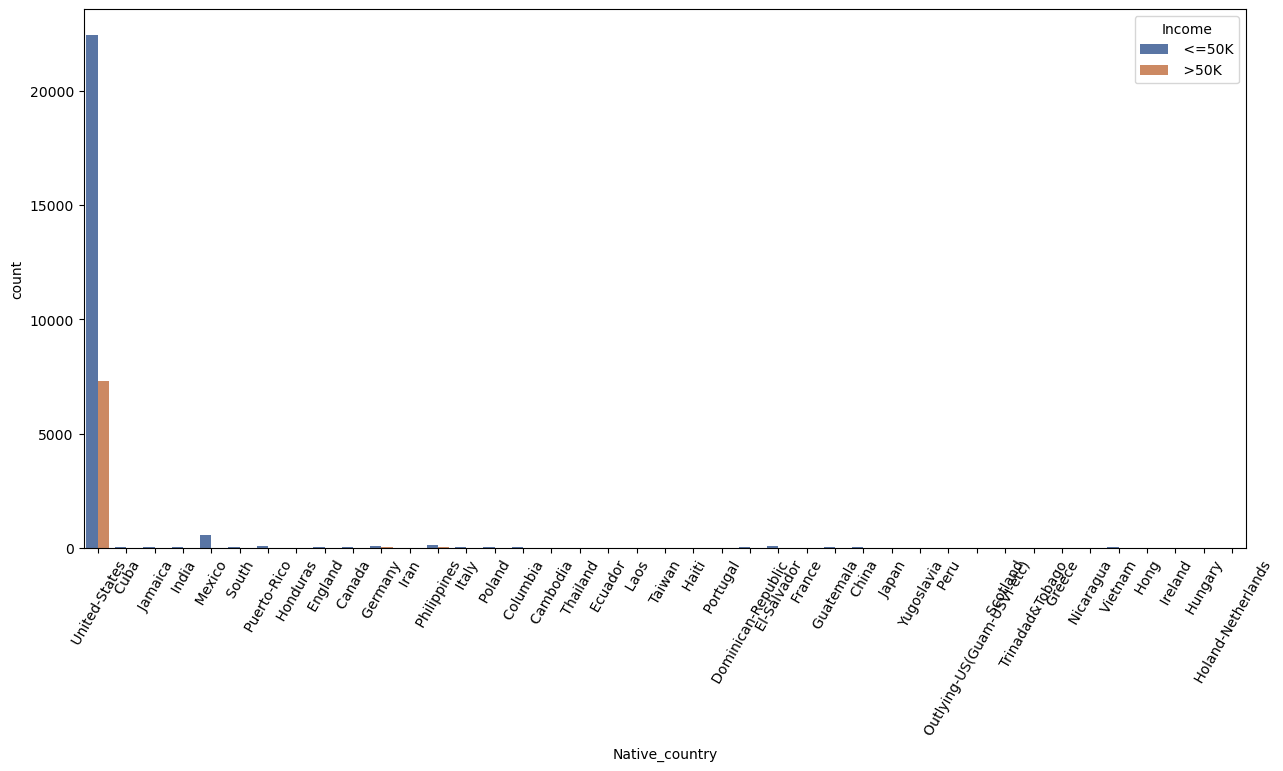

In [256]:
plt.figure(figsize=(15,7))
sns.countplot(x='Native_country', hue='Income', data=df)
plt.xticks(rotation=60)

# Label Encoder

In [257]:
from sklearn.preprocessing import LabelEncoder

In [258]:
le = LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [259]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,20,38,0


# Cheking Skewness

In [260]:
df.skew()

Age               0.557657
Workclass         0.075983
Fnlwgt            1.447695
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.000407
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Hours_per_week    0.228752
Native_country   -4.247065
Income            1.211640
dtype: float64

# Cheking Outliers

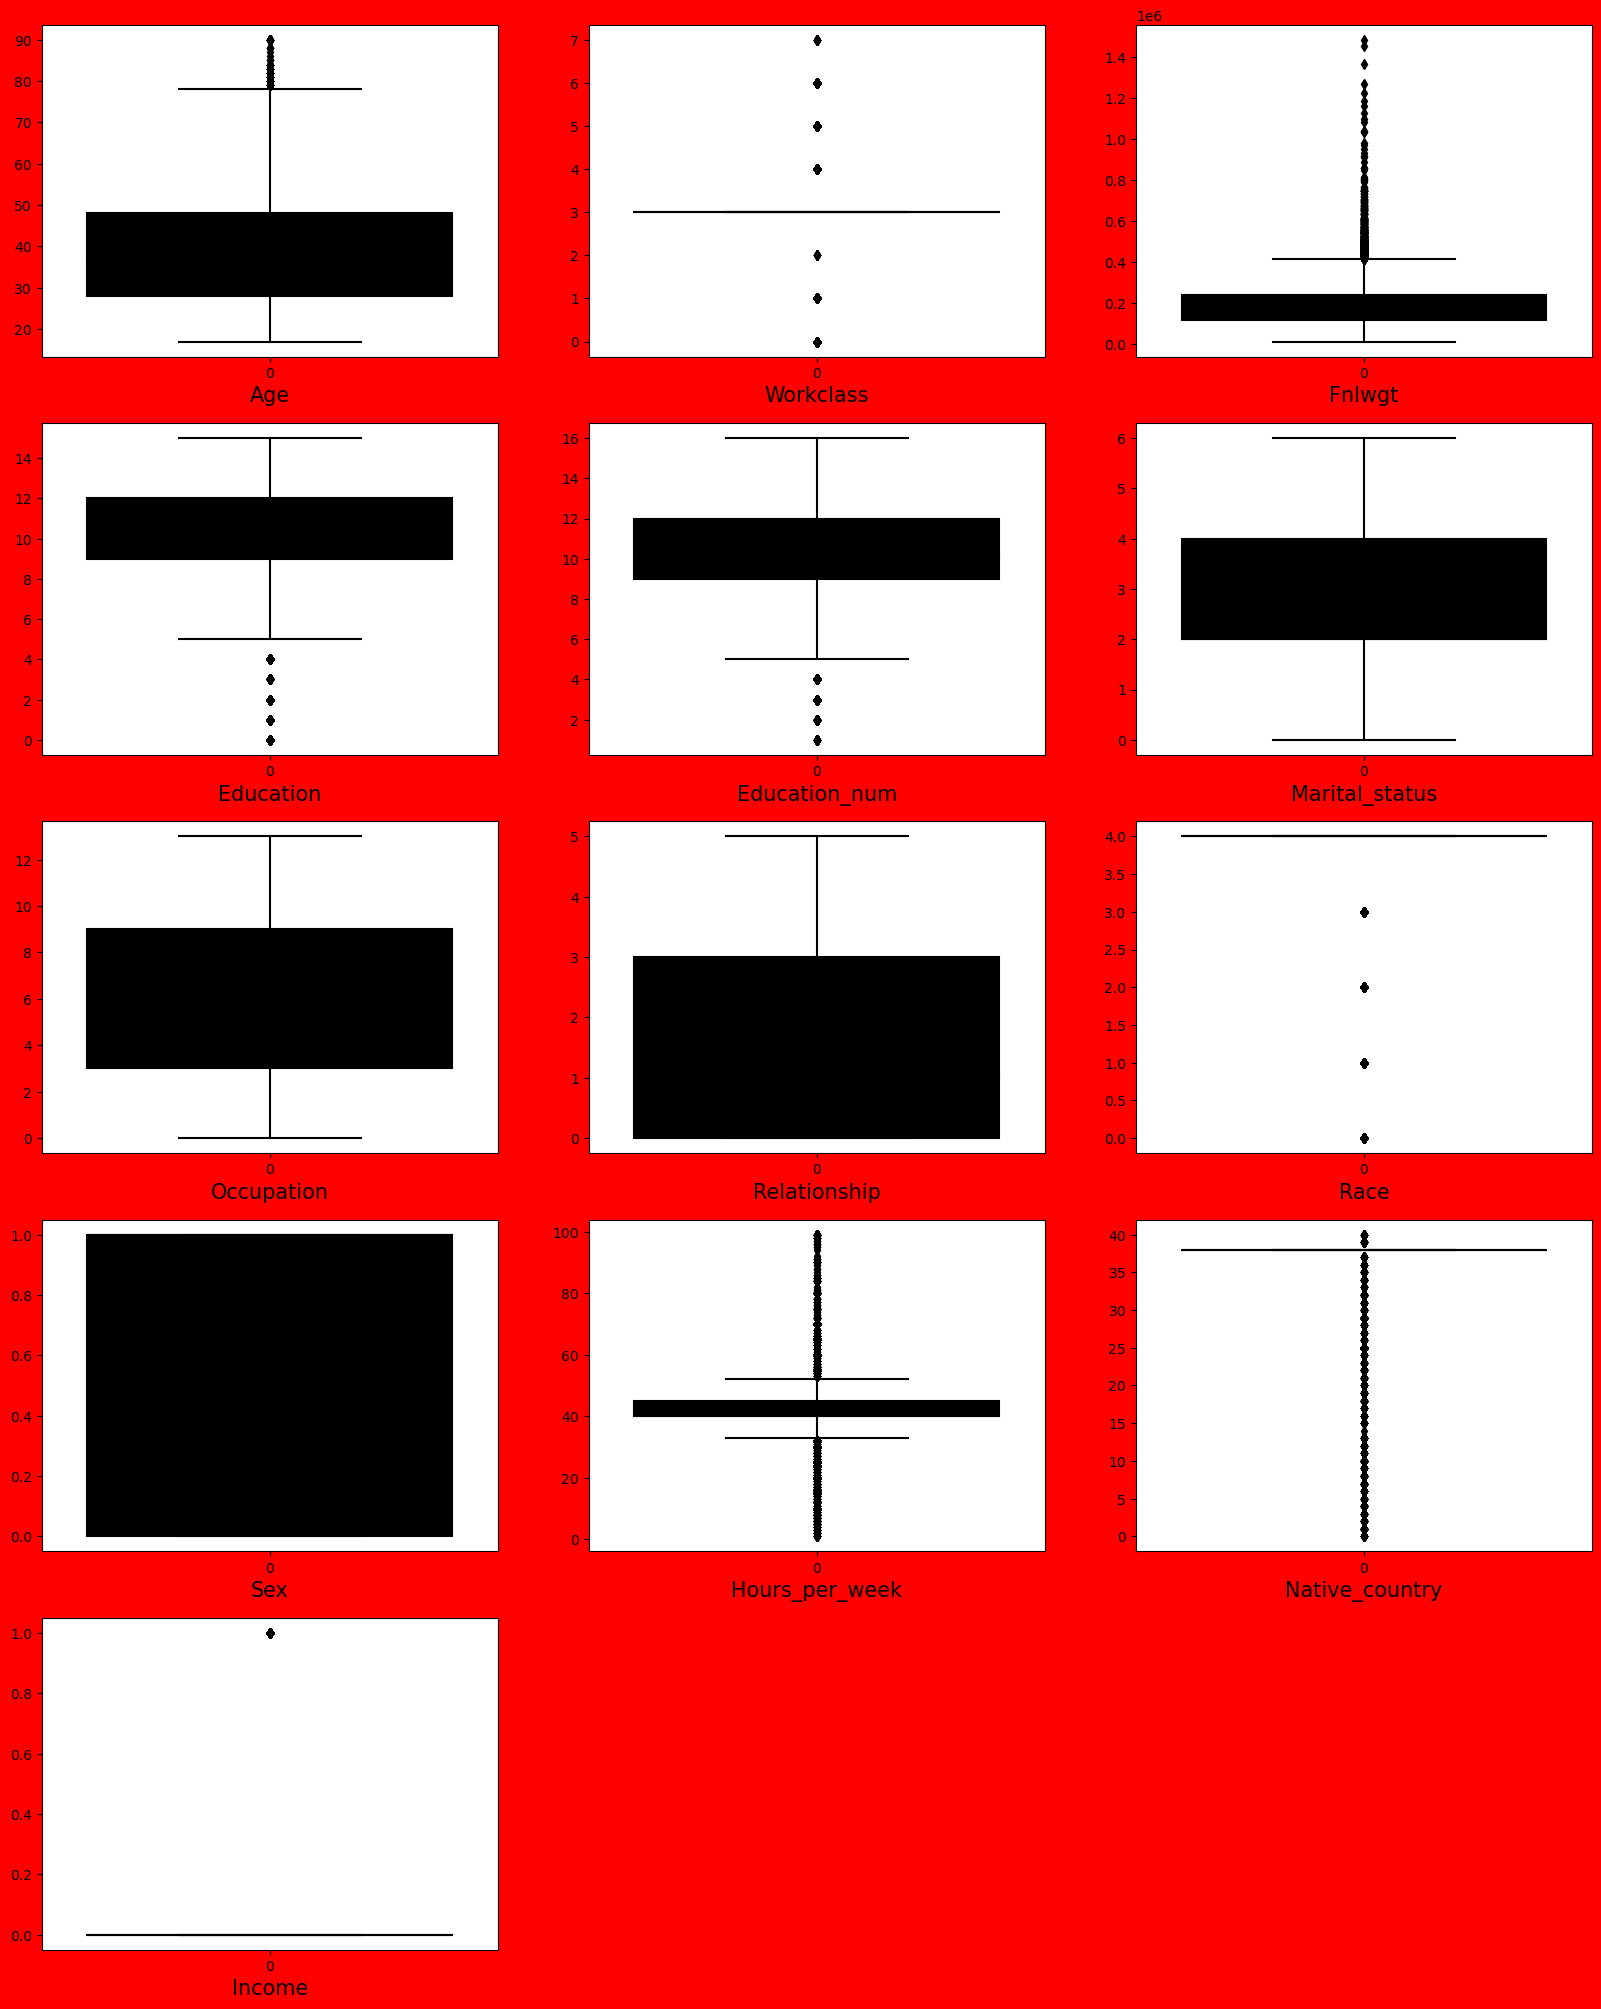

In [261]:
plt.figure(figsize=(20,25),facecolor= 'red')
pltnum=1
for col in df:
    if pltnum<=13:
        ax=plt.subplot(5,3,pltnum)
        sns.boxplot(df[col],color='black')
        plt.xlabel(col, fontsize=15)
    pltnum+=1
plt.show()

# Outliers Removal

In [262]:
from scipy.stats import zscore

In [263]:
z= np.abs(zscore(df))

In [264]:
threshold=3
df1=df[(z<3).all(axis=1)]

In [265]:
df1.shape

(29277, 13)

In [266]:
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.035649,-0.075938,0.000381,0.056521,-0.286309,0.000467,-0.271453,0.023820,0.094606,0.096319,0.037309,0.250895
Workclass,0.035649,1.000000,-0.025061,0.003914,0.003308,-0.020856,0.007576,-0.056948,0.066730,0.071142,0.030858,0.002560,0.003146
Fnlwgt,-0.075938,-0.025061,1.000000,-0.022599,-0.037017,0.028885,0.003251,0.013702,-0.101142,0.023629,-0.017969,-0.103580,-0.010377
Education,0.000381,0.003914,-0.022599,1.000000,0.341300,-0.039393,-0.040923,-0.011770,0.028024,-0.028543,0.060236,0.090287,0.072865
Education_num,0.056521,0.003308,-0.037017,0.341300,1.000000,-0.065135,0.076649,-0.098403,0.086799,0.010937,0.166038,0.146072,0.338394
Marital_status,-0.286309,-0.020856,0.028885,-0.039393,-0.065135,1.000000,0.035419,0.184681,-0.087019,-0.130116,-0.198845,-0.032164,-0.197711
Occupation,0.000467,0.007576,0.003251,-0.040923,0.076649,0.035419,1.000000,-0.039069,0.002164,0.048218,-0.019684,0.019329,0.033971
Relationship,-0.271453,-0.056948,0.013702,-0.011770,-0.098403,0.184681,-0.039069,1.000000,-0.146037,-0.582880,-0.268729,-0.012806,-0.252774
Race,0.023820,0.066730,-0.101142,0.028024,0.086799,-0.087019,0.002164,-0.146037,1.000000,0.125761,0.059528,0.021570,0.098201
Sex,0.094606,0.071142,0.023629,-0.028543,0.010937,-0.130116,0.048218,-0.582880,0.125761,1.000000,0.242075,-0.008395,0.217680


<Axes: >

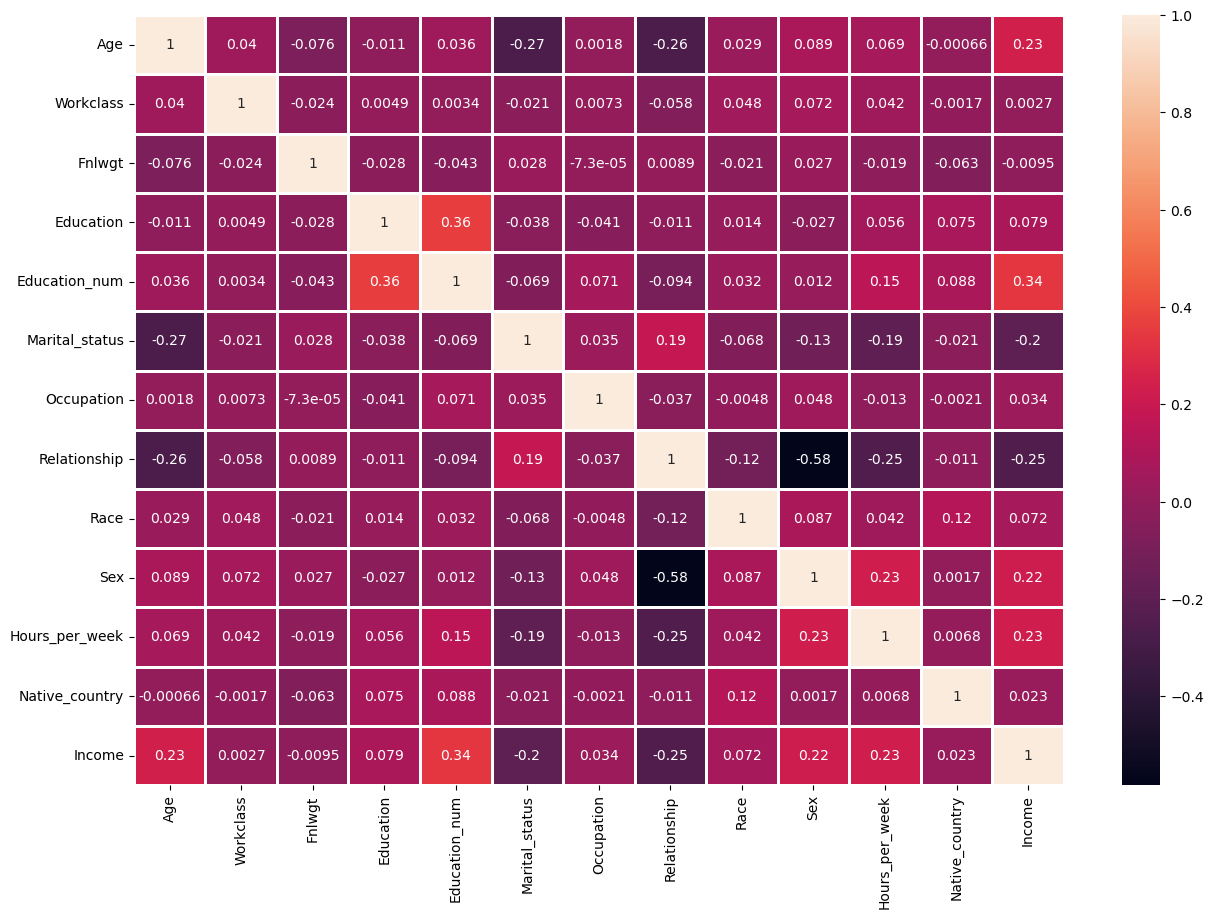

In [267]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=1)

In [268]:
x=df1.drop('Income', axis=1)
y=df1['Income']

In [269]:
x.shape,y.shape

((29277, 12), (29277,))

# Scaling

In [270]:
from sklearn.preprocessing import StandardScaler


In [271]:
st = StandardScaler()
X= st.fit_transform(x)

In [272]:
X= pd.DataFrame(X, columns=x.columns)

# Spliting Train And Test data

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.27,random_state=42)

In [275]:
x_train.shape, y_train.shape

((21372, 12), (21372,))

In [276]:
x_test.shape, y_test.shape

((7905, 12), (7905,))

# Model Building

In [277]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [278]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,X,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.8059571532901215


In [279]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7991144845034788
[[5522  398]
 [1190  795]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5920
           1       0.67      0.40      0.50      1985

    accuracy                           0.80      7905
   macro avg       0.74      0.67      0.69      7905
weighted avg       0.78      0.80      0.78      7905

Training accuracy:: 0.8072244057645518
Test accuracy:: 0.7991144845034788


# Decision Tree Classifier

In [280]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,X,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7745672688795248


In [281]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7674889310562935
[[4993  927]
 [ 911 1074]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5920
           1       0.54      0.54      0.54      1985

    accuracy                           0.77      7905
   macro avg       0.69      0.69      0.69      7905
weighted avg       0.77      0.77      0.77      7905

Training accuracy:: 1.0
Test accuracy:: 0.7674889310562935


# KNeighbors Classifier

In [282]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8142912857629507


In [283]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8049335863377609
[[5241  679]
 [ 863 1122]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      5920
           1       0.62      0.57      0.59      1985

    accuracy                           0.80      7905
   macro avg       0.74      0.73      0.73      7905
weighted avg       0.80      0.80      0.80      7905

Training accuracy:: 0.8723563541081789
Test accuracy:: 0.8049335863377609


# Random Forest Classifier

In [284]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,X,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8237525490799978


In [285]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8206198608475649
[[5361  559]
 [ 859 1126]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5920
           1       0.67      0.57      0.61      1985

    accuracy                           0.82      7905
   macro avg       0.77      0.74      0.75      7905
weighted avg       0.81      0.82      0.82      7905

Training accuracy:: 1.0
Test accuracy:: 0.8206198608475649


# Gradient Boosting Classifier

In [286]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,X,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8410702200727727


In [287]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8346616065781152
[[5465  455]
 [ 852 1133]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5920
           1       0.71      0.57      0.63      1985

    accuracy                           0.83      7905
   macro avg       0.79      0.75      0.76      7905
weighted avg       0.83      0.83      0.83      7905

Training accuracy:: 0.849288789069811
Test accuracy:: 0.8346616065781152


# Hyperparameter Tuning

In [289]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [290]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [291]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8209993674889311


In [292]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

# Training with best parameters

In [293]:
best_param={
    'criterion' : ['entropy'],
    'n_estimators':[1000],
    'min_samples_split':[4],
     'random_state':[10]    }

In [294]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [295]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.823908918406072


# saving Model

In [296]:
import joblib

In [297]:
joblib.dump(best_rfc_grid.best_estimator_,'Census_Income_Project.obj')

['Census_Income_Project.obj']

# ******* Thanking You*****